## Classification Machine Learning Project on Loan Default Data

#### Table Of Content
* Part 1: EDA & Visualization
* Part 2.1: Machine Learning Model - Logistic Regression
* Part 2.2: Machine Learning Model - Decision Tree
* Part 2.3: Machinea Learning Model - Supporting Vector Classification
* Part 2.4: Deep Learning
* Part 3: Unsupervised Machine Learning Model - KMeans Clustering
* Part 4: Recommendation & Conclusion

#### Part 1: EDA & Visualization

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv("Loan_default.csv")
df.head()

,LoanID,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education,EmploymentType,MaritalStatus,HasMortgage,HasDependents,LoanPurpose,HasCoSigner,Default
0,I38PQUQS96,56,85994,50587,520,80,4,15.23,36,0.44,Bachelor's,Full-time,Divorced,Yes,Yes,Other,Yes,0
1,HPSK72WA7R,69,50432,124440,458,15,1,4.81,60,0.68,Master's,Full-time,Married,No,No,Other,Yes,0
2,C1OZ6DPJ8Y,46,84208,129188,451,26,3,21.17,24,0.31,Master's,Unemployed,Divorced,Yes,Yes,Auto,No,1
3,V2KKSFM3UN,32,31713,44799,743,0,3,7.07,24,0.23,High School,Full-time,Married,No,No,Business,No,0
4,EY08JDHTZP,60,20437,9139,633,8,4,6.51,48,0.73,Bachelor's,Unemployed,Divorced,No,Yes,Auto,No,0


In [3]:
df.shape

(255347, 18)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 255347 entries, 0 to 255346
Data columns (total 18 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   LoanID          255347 non-null  object 
 1   Age             255347 non-null  int64  
 2   Income          255347 non-null  int64  
 3   LoanAmount      255347 non-null  int64  
 4   CreditScore     255347 non-null  int64  
 5   MonthsEmployed  255347 non-null  int64  
 6   NumCreditLines  255347 non-null  int64  
 7   InterestRate    255347 non-null  float64
 8   LoanTerm        255347 non-null  int64  
 9   DTIRatio        255347 non-null  float64
 10  Education       255347 non-null  object 
 11  EmploymentType  255347 non-null  object 
 12  MaritalStatus   255347 non-null  object 
 13  HasMortgage     255347 non-null  object 
 14  HasDependents   255347 non-null  object 
 15  LoanPurpose     255347 non-null  object 
 16  HasCoSigner     255347 non-null  object 
 17  Default   

In [5]:
df.describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000,255347.000000
mean,43.498306,82499.304597,127578.865512,574.264346,59.541976,2.501036,13.492773,36.025894,0.500212,0.116128
std,14.990258,38963.013729,70840.706142,158.903867,34.643376,1.117018,6.636443,16.969330,0.230917,0.320379
min,18.000000,15000.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.000000
25%,31.000000,48825.500000,66156.000000,437.000000,30.000000,2.000000,7.770000,24.000000,0.300000,0.000000
50%,43.000000,82466.000000,127556.000000,574.000000,60.000000,2.000000,13.460000,36.000000,0.500000,0.000000
75%,56.000000,116219.000000,188985.000000,712.000000,90.000000,3.000000,19.250000,48.000000,0.700000,0.000000
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.000000


**Observation**:
* The age ranges between 18 and 69.
* The loan amount goes from 5000 to 249999 $.
* Clients have working experience from 0 year to almost 10 years.
* Interest rate on those loans are between 2% and 25%.
* The loan term or the duration on those loans are between 12 months and 60 months.

In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.isnull().sum().sum()

np.int64(0)

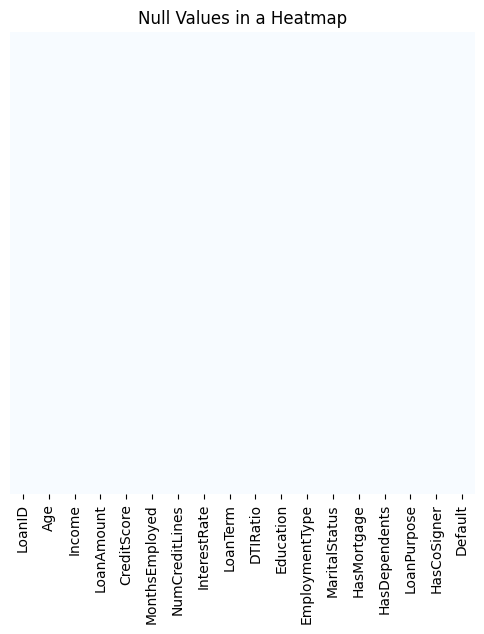

In [8]:
plt.figure(figsize=(6,6))
sns.heatmap(data=df.isnull(), cbar=False, cmap="Blues",yticklabels=False)
plt.title("Null Values in a Heatmap")
plt.show()

<Figure size 1000x500 with 0 Axes>

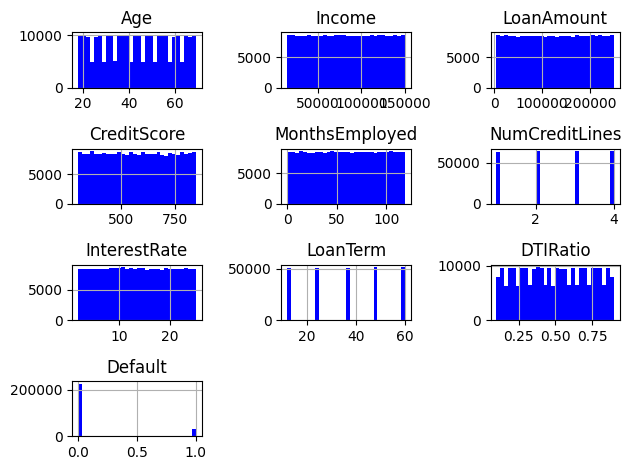

In [9]:
plt.figure(figsize=(10,5))
df.hist(bins=30,color="blue")
plt.title("Distribution on Features")
plt.tight_layout()
plt.show()

In [10]:
num_cols=df.select_dtypes("number").columns.tolist()
obj_cols=df.select_dtypes("object").drop("LoanID",axis=1).columns.tolist()

In [11]:
len(obj_cols)

7

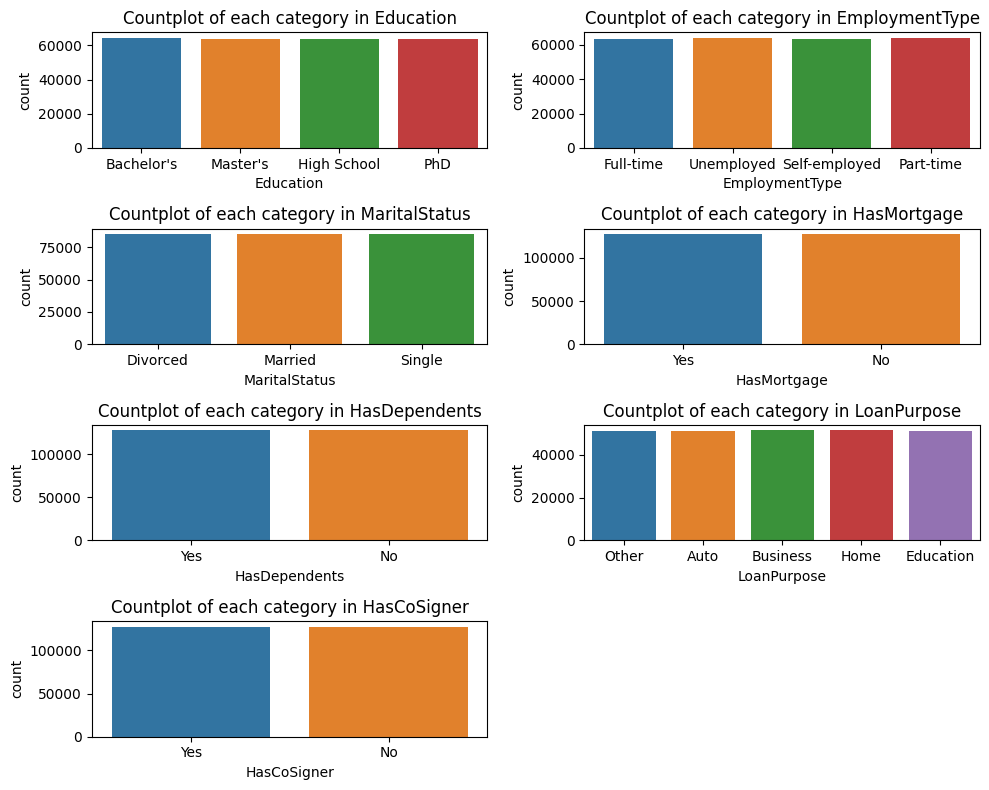

In [12]:
plt.figure(figsize=(10,8))
for num, col in enumerate(obj_cols,1):
    plt.subplot(4,2,num)
    sns.countplot(x=df[col],hue=df[col])
    plt.title(f"Countplot of each category in {col}")
plt.tight_layout()
plt.show()

**Obervation**
* All the features are uniformly distributed.
* For age and DTIRatio, there are two layer's distribution.

#### Anatomy of Default

In [13]:
tot=df.shape[0]
a=np.round(df.Default.mean()*100,2)
default=df.query("Default==1").shape[0]
non_default=df.query("Default==0").shape[0]
print(f"Total number of customers are {tot}.")
print(f"Total number of custumoers who defaulted was {default}.")
print(f"Total number of custumoers who didn't defaulted was {non_default}.")
print(f"The defaut rate is {a}%.")

Total number of customers are 255347.
Total number of custumoers who defaulted was 29653.
Total number of custumoers who didn't defaulted was 225694.
The defaut rate is 11.61%.


**Obervation**:
* The datasets is not balance as the default rate is 11.6%.

In [14]:
df.query("Default==1").describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,29653.000000,29653.000000,29653.000000,29653.000000,29653.000000,29653.000000,29653.000000,29653.000000,29653.000000,29653.0
mean,36.559539,71844.722659,144515.311469,559.286143,50.235457,2.588338,15.896227,36.051394,0.512467,1.0
std,13.897468,40785.099507,69547.822943,158.521855,33.882499,1.118258,6.320304,16.992077,0.229160,0.0
min,18.000000,15004.000000,5000.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,1.0
25%,25.000000,34022.000000,88085.000000,421.000000,21.000000,2.000000,11.060000,24.000000,0.320000,1.0
50%,34.000000,66566.000000,152672.000000,553.000000,46.000000,3.000000,16.930000,36.000000,0.520000,1.0
75%,47.000000,106895.000000,205468.000000,693.000000,78.000000,4.000000,21.360000,48.000000,0.710000,1.0
max,69.000000,149995.000000,249993.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,1.0


In [15]:
df.query("Default==0").describe()

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Default
count,225694.000000,225694.000000,225694.000000,225694.000000,225694.000000,225694.000000,225694.000000,225694.000000,225694.000000,225694.0
mean,44.409962,83899.165995,125353.656017,576.232270,60.764721,2.489566,13.176994,36.022544,0.498602,0.0
std,14.889574,38498.801232,70708.101479,158.849404,34.556394,1.116350,6.612265,16.966374,0.231099,0.0
min,18.000000,15000.000000,5001.000000,300.000000,0.000000,1.000000,2.000000,12.000000,0.100000,0.0
25%,32.000000,50994.000000,63889.250000,439.000000,31.000000,1.000000,7.450000,24.000000,0.300000,0.0
50%,45.000000,84237.500000,124236.000000,577.000000,61.000000,2.000000,12.990000,36.000000,0.500000,0.0
75%,57.000000,117186.750000,186177.750000,714.000000,91.000000,3.000000,18.850000,48.000000,0.700000,0.0
max,69.000000,149999.000000,249999.000000,849.000000,119.000000,4.000000,25.000000,60.000000,0.900000,0.0


In [16]:
a=df[num_cols].groupby("Default").mean()
a.T.rename(columns={0:"Non-Default",1:"Default"}).style.background_gradient(axis=1)

Default,Non-Default,Default
Age,44.409962,36.559539
Income,83899.165995,71844.722659
LoanAmount,125353.656017,144515.311469
CreditScore,576.232270,559.286143
MonthsEmployed,60.764721,50.235457
NumCreditLines,2.489566,2.588338
InterestRate,13.176994,15.896227
LoanTerm,36.022544,36.051394
DTIRatio,0.498602,0.512467


**Observation**
* On average, the clients who tend to churn are younger, have lower incomes, higher loan amount, lower credit scores, less months employed, and higher loan interest rate.

#### Correlation Analysis

Text(0.5, 1.0, 'Correlation Among eatures')

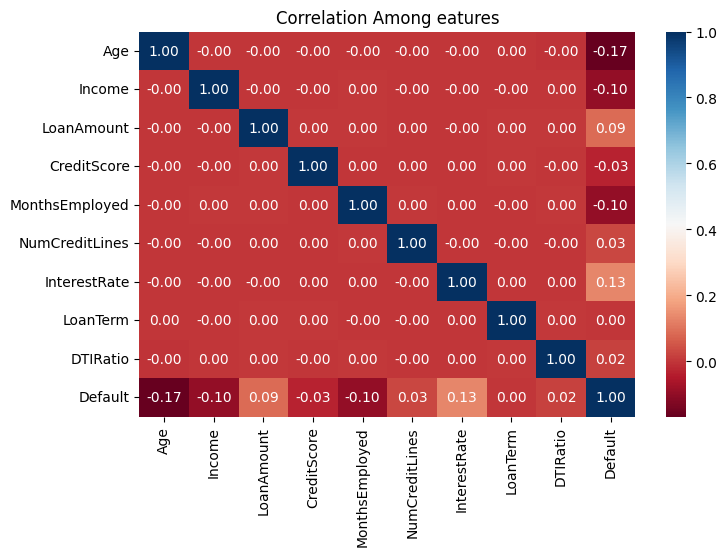

In [17]:
a=df[num_cols].corr()
fig,ax=plt.subplots(figsize=(8,5))
sns.heatmap(a, annot=True, fmt="0.2f", cmap="RdBu")
plt.title("Correlation Among eatures")

**Observation**
* All the independent variables are non-correlated with each other.
* However, The default feature is negatively correlated with  age, income, credit score, and months employed.
* The default feature is positively correlated with number of credit lines, interest rate, and DTI ratio or debt to income ratio.

**Insights**:
* Younger people with less years of working tend to have less money, but end up having loans with high interest rate; therefore they are very linkly to go default.

## Feature to Target variable Analysis

#### Default Rate in terms of categorical features

**Default rate in Age**

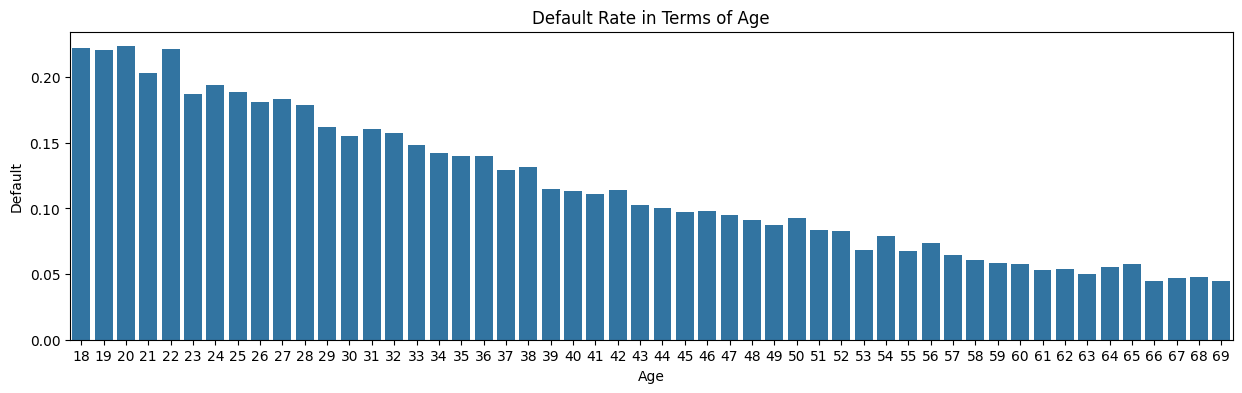

In [18]:
a=df.groupby("Age").Default.mean().reset_index()
plt.figure(figsize=(15,4))
sns.barplot(data=a,x="Age",y="Default")
plt.title("Default Rate in Terms of Age")
plt.show()

**Observation**
* default rate is the highest among the young people and it would come down as age progresses.

#### Default Rate in terms of categorical features

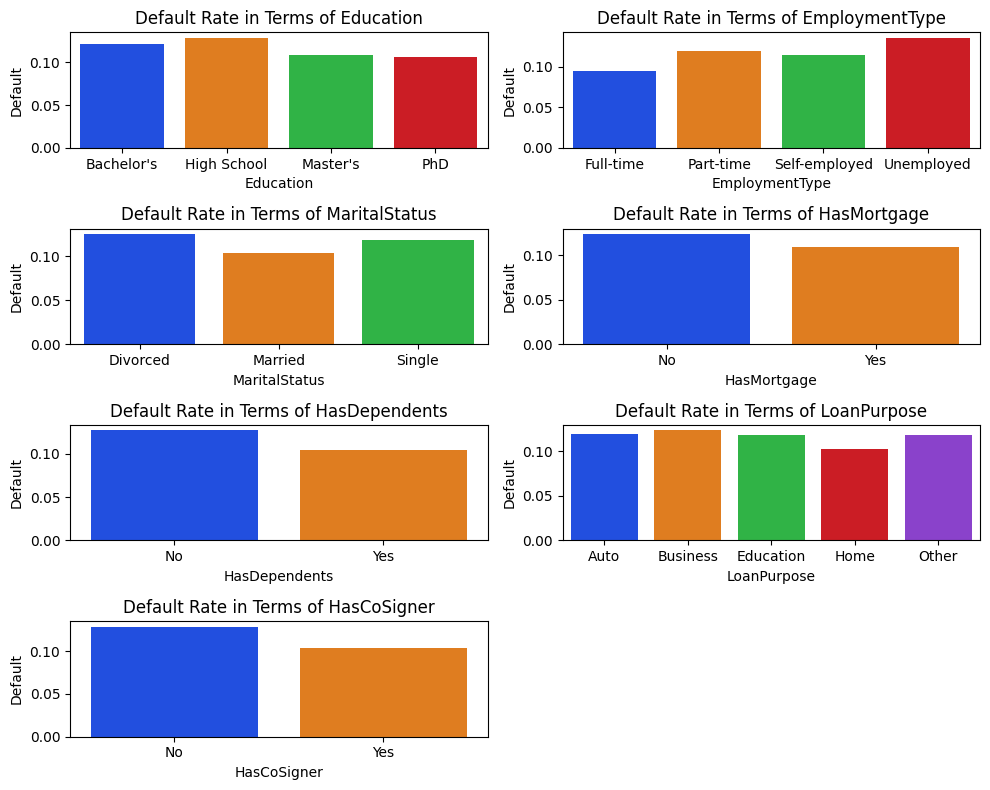

In [19]:
plt.figure(figsize=(10,8))
for num, col in enumerate(obj_cols,1):
    plt.subplot(4,2,num)
    a=df.groupby(col)["Default"].mean().reset_index()
    sns.barplot(data=a, x=col, y="Default",hue=col, palette="bright")
    plt.title(f"Default Rate in Terms of {col}")
plt.tight_layout()
plt.show()

**Observation**
* In terms of education, Bachelor's and High School have the highest default rate. The lower the education, the higher the default rate.
* Part-Time and Unemployed have high default rate. The longer working hour it is, the less likely for the people to go default.
* Divorced and single have high default rate.
* Clients with no mortgages have a high default rate.
* Clients have no dependent have a high default rate.
* Home loans have low default rate; the rest have higher but similar default rate.
* Clients with no co-signers have a high default rate.

**Insights**
* People with a ghier education tend to make more money; therefore they are more apable of handle loan payments.
* For clients who are married, they would able to share the loan payments with their better half; therefore, they are able to habdle the loan payment better as well. That's probably why home loan has the lowest default rate as it was shared by two people. Tha's also why clients with a co-signers ot dependents are less likely to default as well. All it's because they have a partner.
* Clients who work for the longerst hours make more money; therefore they are better at paying off loansa as well.

#### KDE Plot for numerical features in terms of default

In [20]:
num_cols

['Age',
 'Income',
 'LoanAmount',
 'CreditScore',
 'MonthsEmployed',
 'NumCreditLines',
 'InterestRate',
 'LoanTerm',
 'DTIRatio',
 'Default']

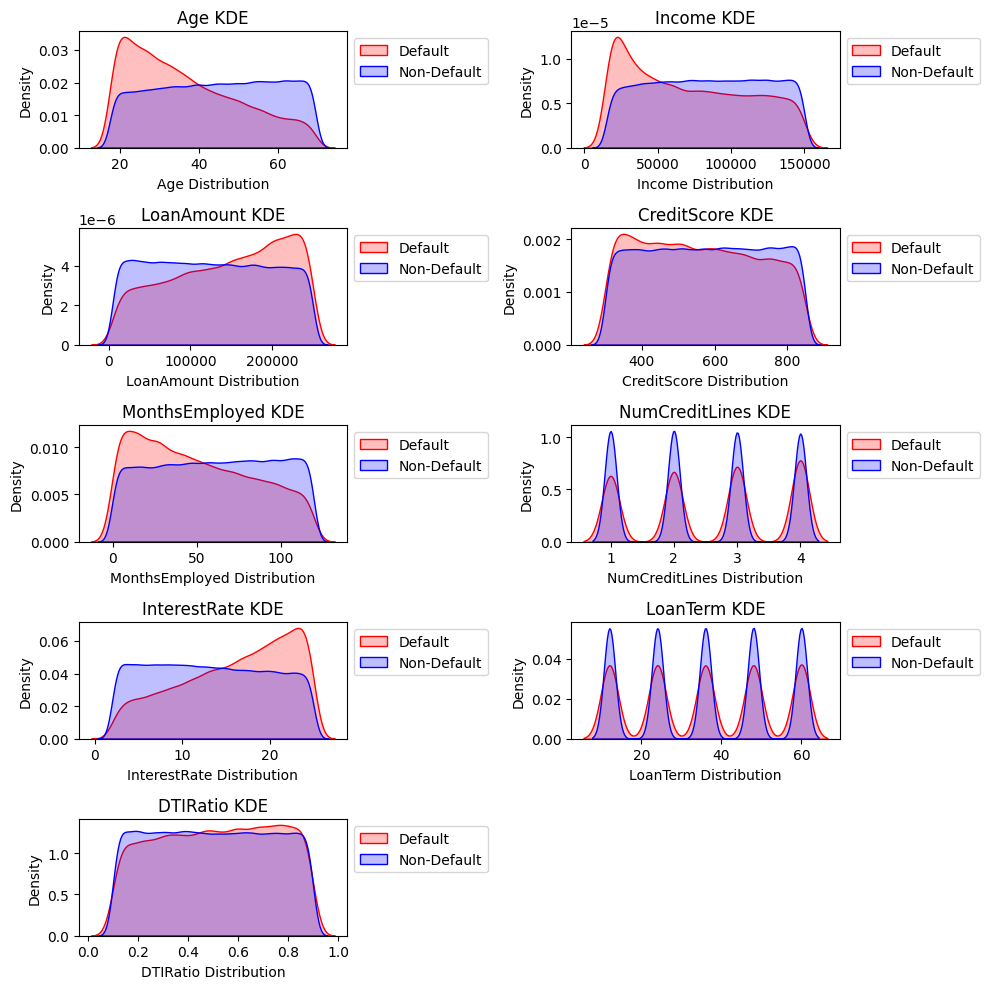

In [21]:
plt.figure(figsize=(10,10))
for num, col, in enumerate(num_cols[:-1],1):
    plt.subplot(5,2,num)
    sns.kdeplot(data=df.query("Default==1"),x=col,label="Default", color="r", fill=True)
    sns.kdeplot(data=df.query("Default==0"),x=col,label="Non-Default", color="b", fill=True)
    plt.xlabel(f"{col} Distribution")
    plt.title(f"{col} KDE")
    plt.legend(bbox_to_anchor=(1,1))
plt.tight_layout()    
plt.show()
    

**Observation**
* Younger people defaulted more than older people.
* Lower income clients have a higher default rate.
* Clients with a higher loan amount tend to default.
* Clients with a low credit scores would have a slightly higher default rate.
* Loaners with a low interest rate tend not to default.
* Loaners with a higher Debt to Income ratios are more likely to default. 

**Insights**
* People with a higher mortgage loans, and loans with a high interest rate, and the loan payment would become very difficult to handle.
* The loan could also beome very difficult to handle if it's beyond the means of the income, and the clients didn't work long enough to get paid well or have a high savings to cope with loan payments. 

## Feature to Feature Analysis

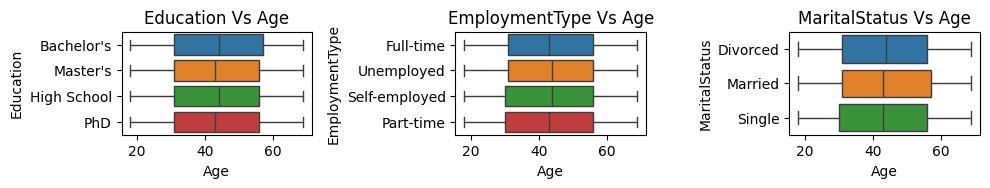

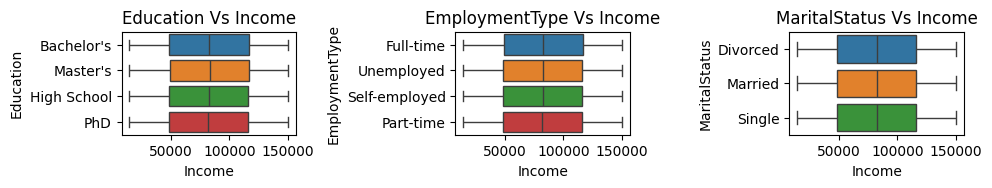

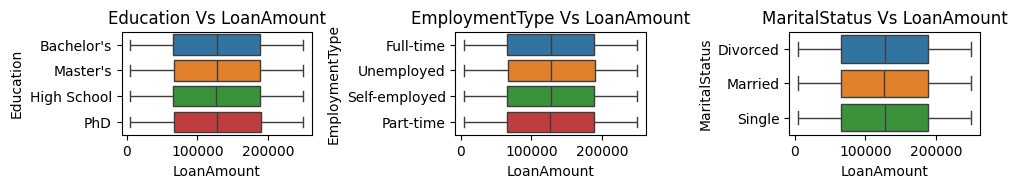

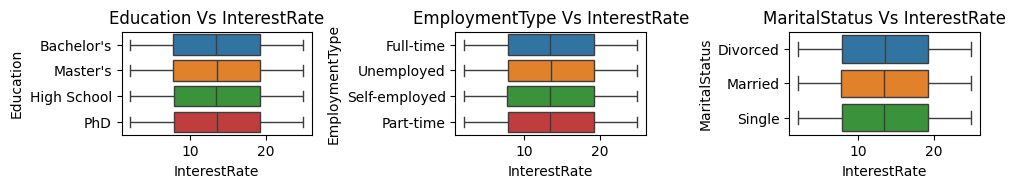

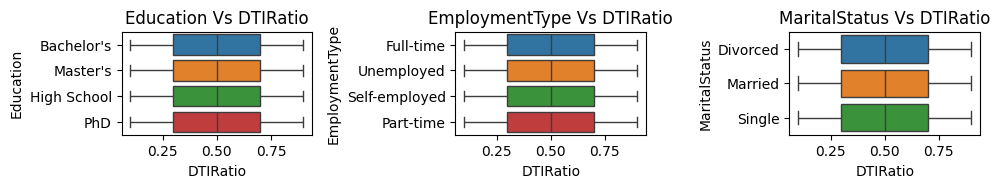

In [22]:
for num in ["Age", "Income", "LoanAmount", "InterestRate", "DTIRatio"]:
    plt.figure(figsize=(10,8))
    for n, col in enumerate(["Education","EmploymentType", "MaritalStatus"]):
        plt.subplot(5,3,n+1)
        sns.boxplot(data=df,y=col, x=num,hue=col)
        plt.title(f"{col} Vs {num}")
    plt.tight_layout()
    plt.show()
#plt.subplot()        

**Obervation**
* All the numerical features are distributed in the same way for each categorical features

#### Conclusion
1.	People at younger age would have less education and lower income and less savings and most of them are singles, so they don’t have much money to earn a high credit score; therefore, they would end up having a loan at a higher interest rate. If they lost their job, they could easily go default.
#### Recommendation
1.	When originate a loan, the bank ought to focus on a client’s earning power. Normally, a higher earner has a high degree, more working experiences.
2.	Also focus on co-signers. If they are married or have a co-signer with earning powers to share the financial burdens, they could avoid the default at time of crisis.



## Part 2.1: Machine Learning - Logistic Regression

#### OneHotEncoding droping the first encoded category and Data Scaling

In [72]:
X=df.drop(["LoanID","Default"],axis=1)
y=df.Default

In [77]:
X_dummies=pd.get_dummies(X,drop_first=True).astype("int")

,Age,Income,LoanAmount,CreditScore,MonthsEmployed,NumCreditLines,InterestRate,LoanTerm,DTIRatio,Education_High School,...,EmploymentType_Unemployed,MaritalStatus_Married,MaritalStatus_Single,HasMortgage_Yes,HasDependents_Yes,LoanPurpose_Business,LoanPurpose_Education,LoanPurpose_Home,LoanPurpose_Other,HasCoSigner_Yes
0,56,85994,50587,520,80,4,15,36,0,0,...,0,0,0,1,1,0,0,0,1,1
1,69,50432,124440,458,15,1,4,60,0,0,...,0,1,0,0,0,0,0,0,1,1
2,46,84208,129188,451,26,3,21,24,0,0,...,1,0,0,1,1,0,0,0,0,0
3,32,31713,44799,743,0,3,7,24,0,1,...,0,1,0,0,0,1,0,0,0,0
4,60,20437,9139,633,8,4,6,48,0,0,...,1,0,0,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
255342,19,37979,210682,541,109,4,14,12,0,0,...,0,1,0,0,0,0,0,0,1,0
255343,32,51953,189899,511,14,2,11,24,0,1,...,0,0,0,0,0,0,0,1,0,0
255344,56,84820,208294,597,70,3,5,60,0,1,...,0,1,0,1,1,0,0,0,0,1
255345,42,85109,60575,809,40,1,20,48,0,1,...,0,0,1,1,1,0,0,0,1,0


In [81]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_dummies, y, test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)

In [82]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
log=LogisticRegression(max_iter=5000, solver="saga", class_weight="balanced")
params={
    "C":np.linspace(0.1,2,20),
    "penalty":["l1","l2"]
}

grid=GridSearchCV(log, params)
grid.fit(X_train_scaled,y_train)

GridSearchCV(estimator=LogisticRegression(class_weight='balanced',
                                          max_iter=5000, solver='saga'),
             param_grid={'C': array([0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. , 1.1, 1.2, 1.3,
       1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2. ]),
                         'penalty': ['l1', 'l2']})

In [83]:
best_params=grid.best_params_

In [84]:
log_model=LogisticRegression(**best_params, max_iter=5000, solver="saga",class_weight="balanced")
log_model.fit(X_train_scaled, y_train)

LogisticRegression(C=np.float64(0.7999999999999999), class_weight='balanced',
                   max_iter=5000, penalty='l1', solver='saga')

In [85]:
y_train_pred=log_model.predict(X_train_scaled)
y_test_pred=log_model.predict(X_test_scaled)

In [86]:
def classification_metrics(X,y,model):
    from sklearn.metrics import accuracy_score, precision_score, recall_score,confusion_matrix, classification_report, precision_recall_curve, f1_score, roc_curve, auc
    y_pred=model.predict(X)
    score=accuracy_score(y,y_pred)
    precision=precision_score(y,y_pred)
    recall=recall_score(y,y_pred)
    f1=f1_score(y,y_pred)
    print(f"The accuracy score is {score}, the precision score is {precision}; the recall score is {recall}; f1_score is {f1}")
    report=classification_report(y,y_pred)
    print(report)
    cm=confusion_matrix(y,y_pred)
    print(f"Confusion Matrix is \n {cm}")
    plt.figure(figsize=(8,5))
    plt.subplot(221)
    sns.heatmap(cm,annot=True,fmt="g",cmap="RdBu",cbar=False)
    plt.title("Heatmap for Confusion Matrix")
   
    
    p_curve,r_curve, t_curve=precision_recall_curve(y,model.predict_proba(X)[:,1])
    plt.subplot(222)
    plt.plot(t_curve, p_curve[:-1],label="Precision")
    plt.plot(t_curve, r_curve[:-1],label="Recall")
    plt.xlabel("Prediction Threshold")
    plt.ylabel("Scores")
    plt.legend()
    plt.title("Precision-Recall-Curve")
   
    # f1-curve
    y_probs=model.predict_proba(X)[:,1]
    thresholds=np.linspace(0,1,100)    
    f1_scores=[f1_score(y,(y_probs>=threshold)) for threshold in thresholds]
    plt.subplot(223)
    plt.plot(thresholds,f1_scores)
    plt.xlabel("Threshold")
    plt.ylabel("F1 Score")
    plt.title("F1 Score")
    
    # ROC Curve
    fpr,tpr,thresholds=roc_curve(y,y_probs)
    auc_score=auc(fpr,tpr)
    plt.subplot(224)
    plt.plot([0,1],[0,1],"k--",label="Random Guess (AUC=0.5)")
    plt.plot(fpr,tpr, label=f"AUC={auc_score:.2f}")
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.title("AUC Curves for Different Models")
    plt.legend()
    plt.tight_layout()
    plt.show()

In [88]:
print(f"The training accuracy is {log_model.score(X_train_scaled,y_train)}")
print(f"The testinging accuracy is {log_model.score(X_test_scaled,y_test)}")


The training accuracy is 0.6749658551868296
The testinging accuracy is 0.6781672214607402


The accuracy score is 0.6781672214607402, the precision score is 0.21901002773629188; the recall score is 0.6959322033898305; f1_score is 0.33317104836092176
              precision    recall  f1-score   support

           0       0.94      0.68      0.79     45170
           1       0.22      0.70      0.33      5900

    accuracy                           0.68     51070
   macro avg       0.58      0.69      0.56     51070
weighted avg       0.86      0.68      0.74     51070

Confusion Matrix is 
 [[30528 14642]
 [ 1794  4106]]


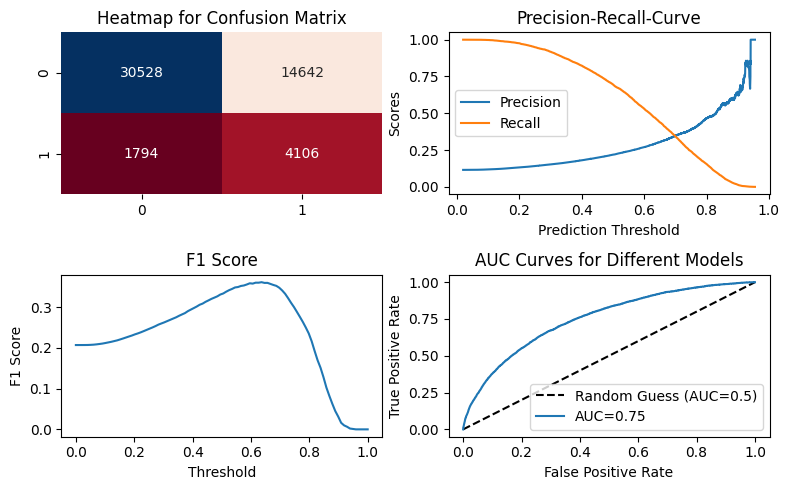

In [89]:
classification_metrics(X_test_scaled,y_test,log_model)

**Observation**
* The training accuracy and the test accuracy are both 67%. The model is not overfit.
* The precision for the positive cases are only 22%, which is very low. 
* F1 score is 79% for negative cases, but only 33% for positive cases. Therefore, the model is better at predicting negative cases han positive cases.

## Part 2.2: Machine Learning Model - DecisionTree Model

#### OneHotEncoding without dropping the first encoded category and no scaling

In [95]:
X=df.drop(["LoanID","Default"],axis=1)
y=df.Default

In [97]:
X_dummies=pd.get_dummies(X).astype("int")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_dummies,y,test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(5,21,5),
    "criterion":["entropy","gini"] 
}
dt_grid=GridSearchCV(dt,params)
dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 5, 10, 15, 20])})

In [98]:
best_params=dt_grid.best_params_
best_params

{'criterion': 'gini', 'max_depth': 20, 'min_samples_leaf': np.int64(5)}

In [99]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', max_depth=20,
                       min_samples_leaf=np.int64(5))

In [100]:
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}")
print("The model is overfit")

The training accuracy is 0.8424443280447628. The testing accuracy is 0.7133738006657528
The model is overfit


<Axes: xlabel='Scores', ylabel='Features'>

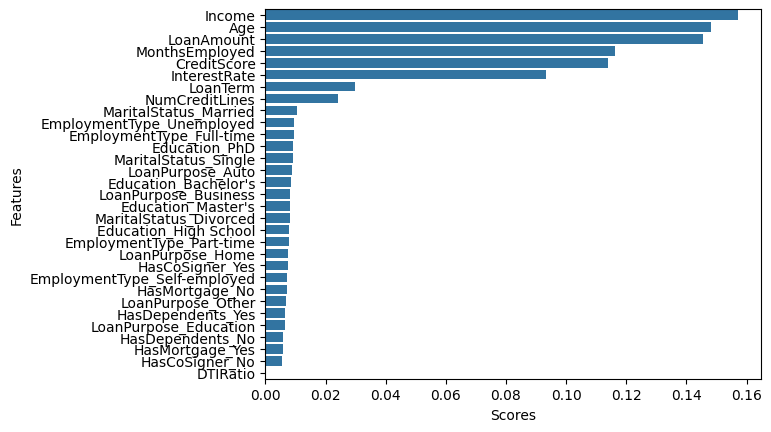

In [102]:
df_importance=pd.DataFrame({"Features":X_dummies.columns,"Scores":dt.feature_importances_})
sns.barplot(df_importance.sort_values("Scores",ascending=False),x="Scores",y="Features")

The training accuracy is 0.8423611077115877. The testing accuracy is 0.7135891913060505. There is overfitting
------------------------
The accuracy score is 0.7135891913060505, the precision score is 0.18295429775484995; the recall score is 0.42677966101694914; f1_score is 0.25611554696638356
              precision    recall  f1-score   support

           0       0.91      0.75      0.82     45170
           1       0.18      0.43      0.26      5900

    accuracy                           0.71     51070
   macro avg       0.55      0.59      0.54     51070
weighted avg       0.83      0.71      0.76     51070

Confusion Matrix is 
 [[33925 11245]
 [ 3382  2518]]


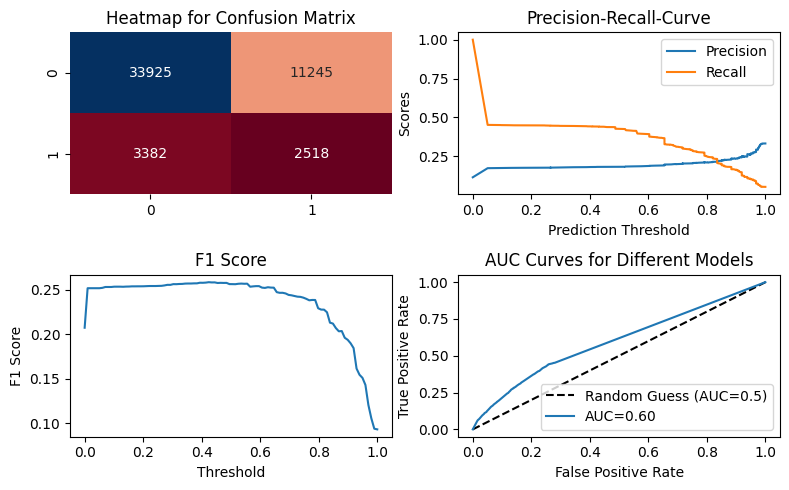

In [104]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}. There is overfitting")
print("------------------------")
classification_metrics(X_test,y_test,dt)

**Observation**
* The training accuracy is 84%, the testing accuracy is 71%. Therefore, it's overfitted.
* Both precision and recall for the positive cases are very low comparing to the negative cases.
* The model is better at predicting negative cases than positive cases.

#### Decision Tree Model with the most important features

In [182]:
important_features=["Income", 
                    "Age", 
                    "LoanAmount",
                   "MonthsEmployed",
                   "CreditScore",
                   "InterestRate"]

In [183]:
X=df[important_features]
y=df.Default
X_dummies=pd.get_dummies(X).astype("int")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_dummies,y,test_size=0.2, random_state=42)
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dt=DecisionTreeClassifier(class_weight="balanced")
params={
    "max_depth":[5,10,15,20],
    "min_samples_leaf":np.arange(5,21,5),
    "criterion":["entropy","gini"] 
}
dt_grid=GridSearchCV(dt,params)
dt_grid.fit(X_train,y_train)

GridSearchCV(estimator=DecisionTreeClassifier(class_weight='balanced'),
             param_grid={'criterion': ['entropy', 'gini'],
                         'max_depth': [5, 10, 15, 20],
                         'min_samples_leaf': array([ 5, 10, 15, 20])})

In [184]:
best_params=dt_grid.best_params_
best_params

{'criterion': 'entropy', 'max_depth': 20, 'min_samples_leaf': np.int64(5)}

In [185]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)

DecisionTreeClassifier(class_weight='balanced', criterion='entropy',
                       max_depth=20, min_samples_leaf=np.int64(5))

The training accuracy is 0.8009222771041282. The testing accuracy is 0.692911689837478. There is overfitting
------------------------
The accuracy score is 0.692911689837478, the precision score is 0.17989660362541718; the recall score is 0.4659322033898305; f1_score is 0.2595722581558944
              precision    recall  f1-score   support

           0       0.91      0.72      0.81     45170
           1       0.18      0.47      0.26      5900

    accuracy                           0.69     51070
   macro avg       0.55      0.59      0.53     51070
weighted avg       0.83      0.69      0.74     51070

Confusion Matrix is 
 [[32638 12532]
 [ 3151  2749]]


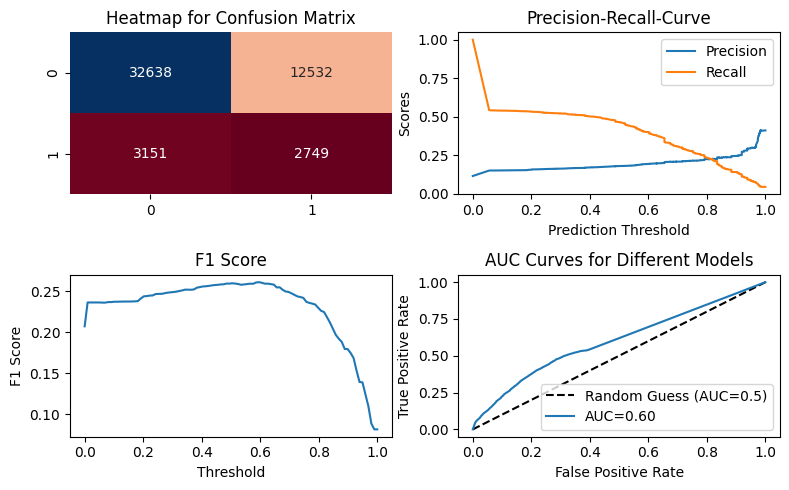

In [186]:
from sklearn.tree import DecisionTreeClassifier
dt=DecisionTreeClassifier(**best_params,class_weight="balanced")
dt.fit(X_train,y_train)
print(f"The training accuracy is {dt.score(X_train,y_train)}. The testing accuracy is {dt.score(X_test,y_test)}. There is overfitting")
print("------------------------")
classification_metrics(X_test,y_test,dt)

**Observation**
* The model is overfitted. The training score is 80%, but the testing score is only 69%.
* f1 score for positive cases is 81%, but the f1 score for the negative cases is only 26%.
* It's better at predicting negative cases rather than positive cases.

## Part 2.3: Deep Learning Model

In [166]:
X=df[important_features]
y=df.Default
X_dummies=pd.get_dummies(X,drop_first=True).astype("int")
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X_dummies,y,test_size=0.2, random_state=42)
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
X_train_scaled=scaler.fit_transform(X_train)
X_test_scaled=scaler.transform(X_test)
input_shape=X_train_scaled.shape[1]

In [167]:
import tensorflow as tf
model=tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units=10,activation="relu",input_shape=(input_shape,)))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=10,activation="relu"))
model.add(tf.keras.layers.Dense(units=1,activation="sigmoid"))

C:\Users\Kun Bi\anaconda3\envs\Data_Science\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [168]:
model.summary()

Model: "sequential_4"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_16 (Dense)                │ (None, 10)             │            40 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_17 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_18 (Dense)                │ (None, 10)             │           110 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_19 (Dense)                │ (None, 1)              │            11 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 271 (1.06 KB)

 Trainable params: 271 (1.06 KB)

 Non-trainable params: 0 (0.00 B)

In [169]:
model.compile(optimizer="Adam",loss="binary_crossentropy", metrics=["accuracy"])

In [170]:
epoch_hist=model.fit(X_train_scaled,y_train,epochs=50,batch_size=50)

Epoch 1/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 520us/step - accuracy: 0.8719 - loss: 0.3660
Epoch 2/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 510us/step - accuracy: 0.8847 - loss: 0.3320
Epoch 3/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 517us/step - accuracy: 0.8852 - loss: 0.3304
Epoch 4/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 526us/step - accuracy: 0.8841 - loss: 0.3340
Epoch 5/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 516us/step - accuracy: 0.8833 - loss: 0.3346
Epoch 6/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 535us/step - accuracy: 0.8845 - loss: 0.3320
Epoch 7/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 524us/step - accuracy: 0.8863 - loss: 0.3281
Epoch 8/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step - accuracy: 0.8851 - loss: 0.3318
Epoch 9/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 500us/step - accuracy: 0.8848 - loss: 0.3314
Epoch 10/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 2s 529us/step - accuracy: 0.8839 - loss: 0.3320
Epoch 11/50
4086/4086 ━━━━━━━━━━━━━━━━━━━━ 3s 517us/step - accuracy: 0.8843 - loss: 0.3330
Epoch 12

In [176]:
y_train_pred=model.predict(X_train_scaled)
y_train_pred=(y_train_pred>0.5).astype("int")
y_test_pred=model.predict(X_test_scaled)
y_test_pred=(y_pred>0.5).astype("int")

6384/6384 ━━━━━━━━━━━━━━━━━━━━ 2s 378us/step
1596/1596 ━━━━━━━━━━━━━━━━━━━━ 1s 385us/step


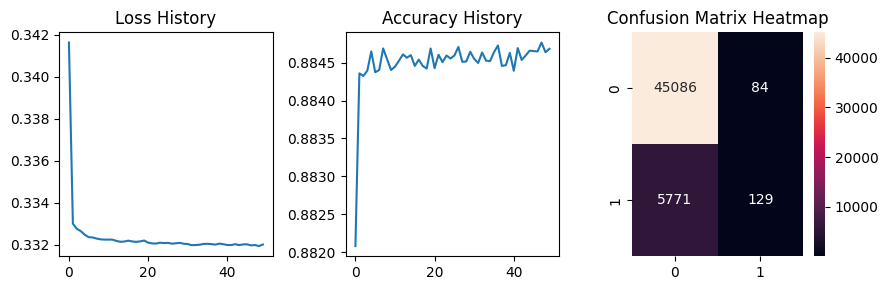

In [177]:
plt.figure(figsize=(9,3))
plt.subplot(131)
plt.plot(epoch_hist.history["loss"])
plt.title("Loss History")
plt.subplot(132)
plt.plot(epoch_hist.history["accuracy"])
plt.title("Accuracy History")
plt.subplot(133)
from sklearn.metrics import confusion_matrix,classification_report
cm=confusion_matrix(y_test,y_test_pred)
sns.heatmap(cm,annot=True,fmt="g")
plt.title("Confusion Matrix Heatmap")
plt.tight_layout()
plt.show()

In [179]:
from sklearn.metrics import accuracy_score as score
print(f"The training accuracy score is {score(y_train,y_train_pred)}")
print(f"The testing accuracy score is {score(y_test,y_test_pred)}")
print(classification_report(y_test,y_test_pred))

The training accuracy score is 0.8847349432388375
The testing accuracy score is 0.8853534364597612
              precision    recall  f1-score   support

           0       0.89      1.00      0.94     45170
           1       0.61      0.02      0.04      5900

    accuracy                           0.89     51070
   macro avg       0.75      0.51      0.49     51070
weighted avg       0.85      0.89      0.84     51070



**Observation**
* The accuracy for training and testing are both 88%. It's a huge improvement.
* However, the recall for the positive case are too low. it's only 2%. It means the model left a good amount of positive cases on the table.
* F1 score for negative cases is 94%, but the f1 score for positive cases is only 4%. It's a good model to predict positive cases rather than the positive cases. 

## Conclusion for Part 2
* All the models are very bad at predicting positive cases. And the precision for the positive cases are terriblely low for all kinds of models.
* The best model is deep learning. it has an accuracy of 88%. The logistic regression has an accuracy of 67%. Decision Tree model are overfitted. SVM model is

#### The End
#### Thank You